<a href="https://colab.research.google.com/github/cameronv10/Project-2/blob/main/Project_2_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/cameronv10/Project-2/main/data.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X = df[['energy']]
Y = df['liveness']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:4]  

array([0.15104653, 0.13899044, 0.14751008, 0.13561474])

In [13]:
lm.intercept_

0.08128196607502723

In [14]:
lm.coef_

array([0.16074785])

In [28]:
Z = df[['loudness', 'liveness', 'energy', 'danceability']]
lm.fit(Z, df['tempo'])

LinearRegression()

In [17]:
import seaborn as sns
%matplotlib inline 

(0.0, 227.9046)

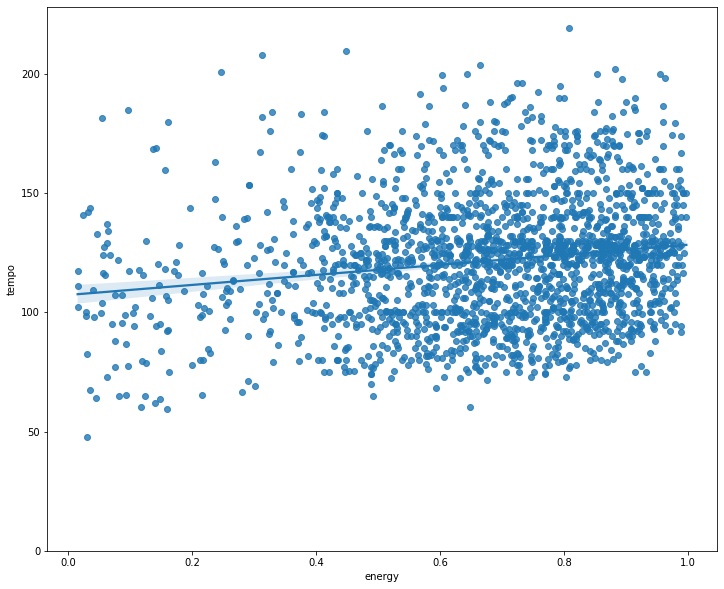

In [32]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="energy", y="tempo", data=df)
plt.ylim(0,)

(0.0, 1.04716)

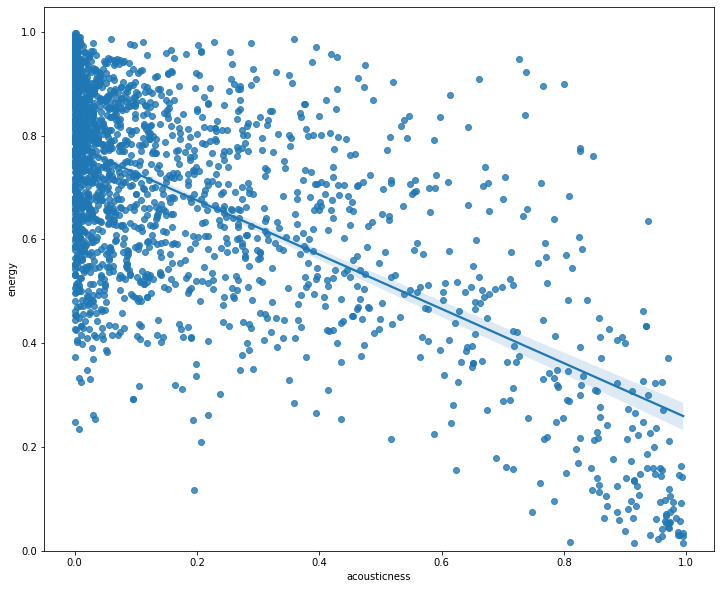

In [33]:
plt.figure(figsize=(width, height))
sns.regplot(x="acousticness", y="energy", data=df)
plt.ylim(0,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


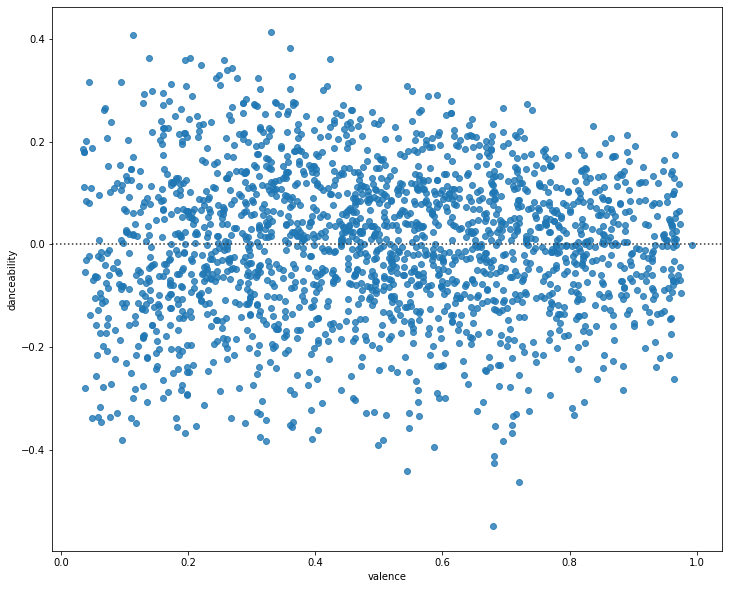

In [31]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['valence'], df['danceability'])
plt.show()

In [29]:
Y_hat = lm.predict(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


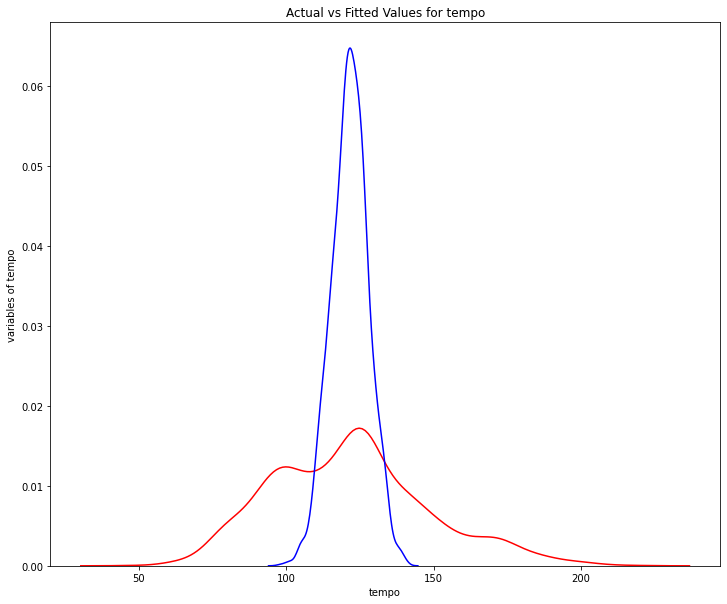

In [37]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['tempo'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for tempo')
plt.xlabel('tempo')
plt.ylabel('variables of tempo')

plt.show()
plt.close()

In [39]:
lm.fit(Z, df['tempo'])
print('The R-square is:', lm.score(Z, df['tempo']))

The R-square is: 0.05645235906434609


In [57]:
X= df[['loudness', 'liveness', 'energy', 'danceability']]

In [58]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [111.40437739 111.94551129 112.19298668 115.40563127]


In [50]:
from sklearn.metrics import mean_squared_error

In [54]:
mse = mean_squared_error(df['tempo'], Yhat)
print('The mean square error of tempo and predicted value is: ', mse)

The mean square error of tempo and predicted value is:  671.5873822032239


In [59]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for tempo ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('tempo')

    plt.show()
    plt.close()

In [60]:
import numpy as np

In [64]:
x = df['tempo']
y = df['energy']

In [65]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

           3             2
3.787e-07 x - 0.0001751 x + 0.02671 x - 0.6345


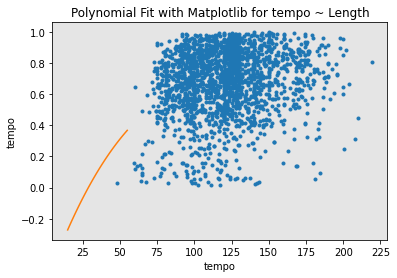

In [66]:
PlotPolly(p, x, y, 'tempo')